# Boosting collaboration in the most active departments
This analysis will show (based on data of messages between employees):
- The most active departments
- The least active departments
- The most active employees

## In short our recommendation:
The company would benefit the most from a boost in collaboration in the Sales, Operations and Admin departments.



## Analysis
To properly analyze the data I first create a dataframe consisting of a combination of both the employees dataframe and the messages dataframe.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
employees = pd.read_csv('data/employees.csv')

In [4]:
merged_df = pd.merge(messages, employees, how="left", left_on = "sender", right_on = "id")
merged_df = merged_df.drop(["id"], axis = 1)
merged_df.columns = ['sender', 'receiver', 'timestamp', 'message_length', 'department_sender',
       'location_sender', 'age_sender']

In [5]:
merged_df = pd.merge(merged_df, employees, how="left", left_on = "receiver", right_on = "id")
merged_df = merged_df.drop(["id"], axis = 1)
merged_df.columns = ['sender', 'receiver', 'timestamp', 'message_length', 'department_sender',
       'location_sender', 'age_sender', 'department_receiver',
       'location_receiver', 'age_receiver']


## Graphs
Below are graphs of the number of messages from sender and receiver per department.

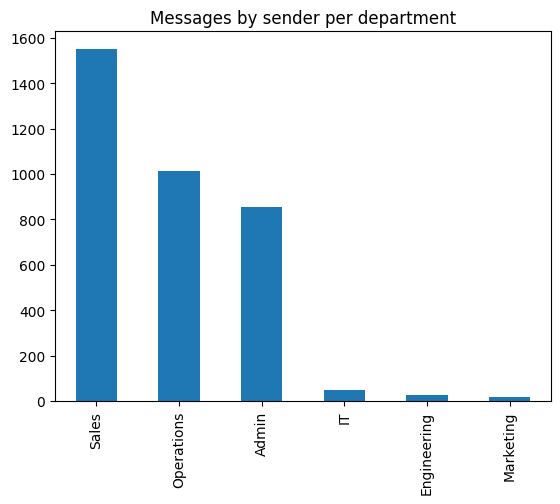

In [21]:
plt.figure()
merged_df['department_sender'].value_counts().plot(kind='bar')
plt.title("Messages by sender per department")
plt.show()



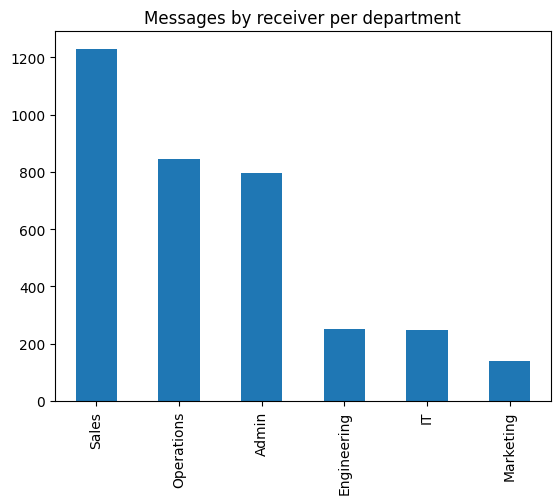

In [20]:
plt.figure()
merged_df['department_receiver'].value_counts().plot(kind='bar')
plt.title("Messages by receiver per department")
plt.show()

For both the senders and receivers the most important departments are Sales, Operations and Admin.

The departments IT, engineering and marketing are the least active departments.


In [9]:
merged_df["sender"].value_counts()[:10]

605    459
128    266
144    221
509    216
389    196
598    187
317    184
586    180
483    169
725    137
Name: sender, dtype: int64

The employee with employee_id 605 is the employee with the most messages.

In [10]:
connection_df = merged_df.copy()

To see the number of people each sender interacts with I create a new dataframe where I add a column per unique connection. I then drop all duplicate values to get number of unique connections of each sender.


In [11]:
connection_df["unique_connection"] = connection_df["sender"] + connection_df["receiver"]
connection_df = connection_df.drop_duplicates(subset = ["unique_connection"])
connection_df["sender"].value_counts()[:10]

598    65
144    64
586    57
605    51
509    46
128    45
389    44
317    39
725    30
483    28
Name: sender, dtype: int64

The above value_counts gives that employee 598 has had the most different connections within the company.

In [12]:
top_employees = connection_df[connection_df["sender"].isin([598,144,586,605,509])].drop_duplicates(subset = ["sender"])
top_employees.iloc[:,[0,4,5,6]]

,sender,department_sender,location_sender,age_sender
6,144,Sales,US,50
343,509,Admin,US,39
446,586,Operations,France,38
473,598,Operations,US,38
498,605,Admin,France,31


The above table shows the department, location and age of the 5 employees with the most connections.

# Summary  

The most active departments are:
- Sales
- Operations
- Admin
<br/><br/>
The least active departments are:
- Engineering
- IT
- Marketing
<br/><br/>
The most active employees are:
- 598	Engineering
- 144	Sales
- 586	Engineering
- 605	Admin
- 509	Admin
<br/><br/>
## Recommendation
This analysis shows that the company would benefit the most from a boost in collaboration in the Sales, Operations and Admin departments.